<a href="https://colab.research.google.com/github/gifted-clover95/photo-gallery-for-everyone/blob/main/no%2Be040.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
class photo_gallery_for_everyone :
    def __init__(self, file_name):
        self.file_name = file_name
        self.count = 0
        self.height = 670
        self.width = 1280
        self.img = np.ones((self.height, self.width, 3), dtype=np.uint8) * 255
        self.origin = (self.height, self.width)
        self.scale = 1.0

    def set_origin_center(self):
        self.origin = (self.height//2, self.width//2)

    def show(self,im = 0):
        if type(im) != np.ndarray:
            im = self.img
        plt.imshow(im)
        #plt.show()
        self.count += 1
        plt.imsave(self.file_name + str(self.count).zfill(3) + '.png', im)

In [3]:
pg = photo_gallery_for_everyone('no+e_photo_gallery_040_')

In [4]:
def line (img, p1, p2, q1, q2, color=(0,0,0)):
    x1 = p1 + 0.5; x2 = q1 + 0.5
    y1 = p2 + 0.5; y2 = q2 + 0.5
    h = abs(q1-p1); w = abs(q2-p2)
    M = max(h,w)+1
    eps = 1.0/M
    for t in np.linspace(0,1, M ):
        x = int(t*x1+(1-t)*x2)
        y = int(t*y1+(1-t)*y2)
        img[x, y, 0] =  color[0]
        img[x, y, 1] =  color[1]
        img[x, y, 2] =  color[2]

In [5]:
def adjust_size (P, photo_gallery, eps=10):
    h = P[:,:,0].max() - P[:,:,0].min()
    w = P[:,:,1].max() - P[:,:,1].min()
    R = min( (photo_gallery.height-eps) / h, (photo_gallery.width-eps)/ w)
    P = R * P; h = R * h; w = R * w

    x = 0.5 * (photo_gallery.height-h) - P[:,:,0].min()
    y = 0.5 * (photo_gallery.width-w) - P[:,:,1].min()
    P = P + np.array([x,y])
    return P

In [6]:
def get_t0 (n1, m1, n2, m2):
    d1 = math.gcd(n1,m1)
    d2 = math.gcd(n1*n2, m1*m2)
    n3 = n1 // d1; m3 = (n1*n2)//d2
    d3 = math.gcd(n3, m3)
    return (n3*m3)//d3

In [7]:
def wild_gear (n1, m1, n2, m2, r3, r4, r5):
    r1 = n1 / m1
    r2 = n2 / m2
    a = 1 - r1 * (1 - r3 * r4 * (1 - r2))
    b = r1 * (1 - r3)
    c = r1 * r2 * r3 * r4 * r5

    t0 = 0; t1 = 2 * get_t0(n1,m1,n2,m2) * np.pi
    t = np.linspace(t0,t1, int(t1) * 10)
    n = len(t)
    P = np.zeros((1, n, 2))

    P[0,:,0] = a * np.cos(t) + b * np.cos((1-1/r1)*t) + c * np.cos((1-1/(r1*r2))*t)
    P[0,:,1] = a * np.sin(t) + b * np.sin((1-1/r1)*t) + c * np.sin((1-1/(r1*r2))*t)
    P = adjust_size (P, pg, eps= 100)

    pg.img[:,:,:] = 255
    for i in range(n):
        line(pg.img,
             round(P[0][i-1][0]), round(P[0][i-1][1]),
             round(P[0][i][0]),round(P[0][i][1]), (0,0,0))

    pg.show()

In [8]:
def wild_gear2 (n1, m1, n2, m2, r3, r4) :
    r1 = n1 / m1
    r2 = n2 / m2
    a = 1 - r1 * (1 - r3 * r4 * (1 - r2))
    b = r1 * (1 - r3)

    n_r5 = 11
    t0 = 0; t1 = 2 * get_t0(n1,m1,n2,m2) * np.pi
    t = np.linspace(t0,t1, int(t1) * 10)
    n = len(t)
    P = np.zeros((n_r5, n, 2))

    k = 0
    for r5 in np.linspace(0,1,n_r5):
        c = r1 * r2 * r3 * r4 * r5
        P[k,:,0] = a * np.cos(t) + b * np.cos((1-1/r1)*t) + c * np.cos((1-1/(r1*r2))*t)
        P[k,:,1] = a * np.sin(t) + b * np.sin((1-1/r1)*t) + c * np.sin((1-1/(r1*r2))*t)
        k += 1

    P = adjust_size (P, pg, eps= 100)

    pg.img[:,:,:] = 255
    for k in range(n_r5):
        for i in range(n):
            line(pg.img,
                 round(P[k][i-1][0]), round(P[k][i-1][1]),
                 round(P[k][i][0]),round(P[k][i][1]), (0,0,0))

    pg.show()

1 35 5 6 7 8
2 25 5 6 10 11
3 35 5 6 14 15
4 25 5 6 15 16
5 40 5 6 16 17
6 36 6 7 6 7
7 48 6 7 8 9
8 21 7 8 6 7
9 49 7 8 7 8
10 35 7 8 10 11
11 21 7 8 12 13
12 49 7 8 14 15
13 35 7 8 20 21
14 32 8 9 12 13
15 40 8 9 15 16
16 27 9 10 6 7
17 36 9 10 8 9
18 27 9 10 15 16
19 22 11 12 8 9
20 33 11 12 9 10
21 44 11 12 16 17
22 33 11 12 18 19
23 39 13 14 6 7
24 28 14 15 6 7
25 42 14 15 9 10
26 28 14 15 10 11
27 45 15 16 6 7
28 45 15 16 12 13
29 34 17 18 12 13
30 38 19 20 8 9
31 40 20 21 6 7
32 40 20 21 14 15


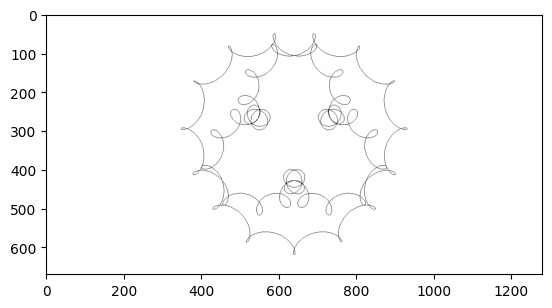

In [9]:
count = 0
for i in range(5,21):
    for j in range(6,21):
        c = get_t0(i, i+1, j, j+1)
        if 20 < c and c < 50 and count < 40:
            wild_gear(i, i+1, j, j+1, 0.5, 0.5, 1.0)
            count += 1
            print(count, c, i,i+1, j,j+1)